# 2 - 50 Year vs 15 Year Module

Comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability.

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_DEMICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [2]:
import PV_DEMICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
r1 = PV_DEMICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='50_Year_Module', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['50_Year_Module'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

r1.createScenario(name='15_Year_Module', file=r'..\baselines\baseline_modules_US.csv')
r1.scenario['15_Year_Module'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [5]:
r1.scenario['50_Year_Module'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing'],
      dtype='object')

In [11]:
r1.scenario['50_Year_Module'].data['mod_reliability_t50'] = 50
r1.scenario['50_Year_Module'].data['mod_reliability_t90'] = 60
r1.scenario['50_Year_Module'].data['mod_lifetime'] = 50

r1.scenario['15_Year_Module'].data['mod_reliability_t50'] = 15
r1.scenario['15_Year_Module'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module'].data['mod_lifetime'] = 15

In [12]:
r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


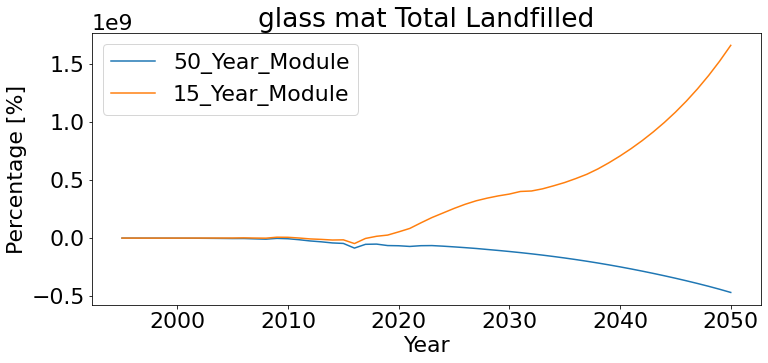

In [13]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

In [17]:
r1.scenario['50_Year_Module'].material['glass'].materialdata.head()

,year,mat_virgin_eff,mat_massperm2,mat_MFG_eff,mat_MFG_scrap_recycled,mat_MFG_scrap_recycling_eff,mat_MFG_scrap_Recycled_into_HQ,mat_MFG_scrap_Recycled_into_HQ_Reused4MFG,mat_EOL_collected_Recycled,mat_EOL_Recycling_eff,...,mat_MFG_Scrap_Recycled_Losses_Landfilled,mat_MFG_Recycled_into_HQ,mat_MFG_Recycled_into_OQ,mat_MFG_Recycled_HQ_into_MFG,mat_MFG_Recycled_HQ_into_OU,mat_Virgin_Stock,mat_Total_EoL_Landfilled,mat_Total_MFG_Landfilled,mat_Total_Landfilled,mat_Total_Recycled_OU
0,1995,99.9,8.75,74.6,80.0,50.0,20.0,10.0,100.0,40.0,...,-8.379455e+05,-167589.106815,-670356.427261,-16758.910682,-150830.196134,8.264254e+06,0.000000,-1.256918e+06,-1.256918e+06,-8.211866e+05
1,1996,99.9,8.75,74.6,80.0,50.0,20.0,10.0,100.0,40.0,...,-9.026159e+05,-180523.186367,-722092.745468,-18052.318637,-162470.867730,8.902067e+06,0.000026,-1.353924e+06,-1.353924e+06,-8.845636e+05
2,1997,99.9,8.75,74.6,80.0,50.0,20.0,10.0,100.0,40.0,...,-9.823081e+05,-196461.627120,-785846.508481,-19646.162712,-176815.464408,9.688033e+06,0.002528,-1.473462e+06,-1.473462e+06,-9.626620e+05
3,1998,99.9,8.75,74.6,80.0,50.0,20.0,10.0,100.0,40.0,...,-1.065072e+06,-213014.410188,-852057.640751,-21301.441019,-191712.969169,1.050429e+07,0.038816,-1.597608e+06,-1.597608e+06,-1.043771e+06
4,1999,99.9,8.75,74.6,80.0,50.0,20.0,10.0,100.0,40.0,...,-1.184620e+06,-236923.933294,-947695.733176,-23692.393329,-213231.539965,1.168333e+07,0.281789,-1.776929e+06,-1.776929e+06,-1.160927e+06


In [26]:
r1.scenario['50_Year_Module'].material['glass'].materialdata.iloc[4]

year                                         1.999000e+03
mat_virgin_eff                               9.990000e+01
mat_massperm2                                8.750000e+00
mat_MFG_eff                                  7.460000e+01
mat_MFG_scrap_recycled                       8.000000e+01
mat_MFG_scrap_recycling_eff                  5.000000e+01
mat_MFG_scrap_Recycled_into_HQ               2.000000e+01
mat_MFG_scrap_Recycled_into_HQ_Reused4MFG    1.000000e+01
mat_EOL_collected_Recycled                   1.000000e+02
mat_EOL_Recycling_eff                        4.000000e+01
mat_EOL_Recycled_into_HQ                     1.500000e+01
mat_EOL_RecycledHQ_Reused4MFG                8.000000e+00
mat_modules_NotRecycled                      2.697978e-02
mat_modules_NotCollected                     2.548091e-01
mat_EOL_sento_Recycling                      1.798652e-02
mat_EOL_NotRecycled_Landfilled               0.000000e+00
mat_EOL_Recycled                             1.798652e-02
mat_EOL_Recycl

In [20]:
r1.scenario['50_Year_Module'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_46,EOL_on_Year_47,EOL_on_Year_48,EOL_on_Year_49,EOL_on_Year_50,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55
0,1995,66.8,9.5,50,60,0.55,50,95.0,15.0,40.0,...,24884.110785,18676.794388,13108.428986,8536.658606,10228.861714,0.000000,0.000000,0.000000,0.00000,0.0
1,1996,76.5,10.1,50,60,0.55,50,95.0,15.0,40.0,...,33632.653182,26804.599978,20118.219484,14120.102516,9195.495112,11018.297934,0.000000,0.000000,0.00000,0.0
2,1997,88.2,10.7,50,60,0.55,50,95.0,15.0,40.0,...,43527.109194,36602.089192,29171.185330,21894.462502,15366.770171,10007.367853,11991.106427,0.000000,0.00000,0.0
3,1998,100.1,11.2,50,60,0.55,50,95.0,15.0,40.0,...,53498.792897,47194.465546,39685.981202,31628.989990,23739.170262,16661.490248,10850.533979,13001.411525,0.00000,0.0
4,1999,117.3,11.8,50,60,0.55,50,95.0,15.0,40.0,...,64630.678869,59503.694743,52491.746436,44140.482114,35179.144490,26403.742295,18531.637370,12068.437935,14460.73791,0.0


In [19]:
r1.scenario['50_Year_Module'].data.tail()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_46,EOL_on_Year_47,EOL_on_Year_48,EOL_on_Year_49,EOL_on_Year_50,EOL_on_Year_51,EOL_on_Year_52,EOL_on_Year_53,EOL_on_Year_54,EOL_on_Year_55
51,2046,108547.8631,25.06,50,60,0.5,50,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00195,0.187220,2.703172,17.970759
52,2047,118208.6230,25.06,50,60,0.5,50,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.002124,0.203883,2.943754
53,2048,128729.1904,25.06,50,60,0.5,50,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.002313,0.222029
54,2049,140186.0884,25.06,50,60,0.5,50,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.002519
55,2050,152662.6502,25.06,50,60,0.5,50,98.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000


In [24]:
r1.scenario['50_Year_Module'].data.iloc[4]

year                            1999.000000
new_Installed_Capacity_[MW]      117.300000
mod_eff                           11.800000
mod_reliability_t50               50.000000
mod_reliability_t90               60.000000
                                   ...     
EOL_on_Year_51                 26403.742295
EOL_on_Year_52                 18531.637370
EOL_on_Year_53                 12068.437935
EOL_on_Year_54                 14460.737910
EOL_on_Year_55                     0.000000
Name: 4, Length: 81, dtype: float64

# c

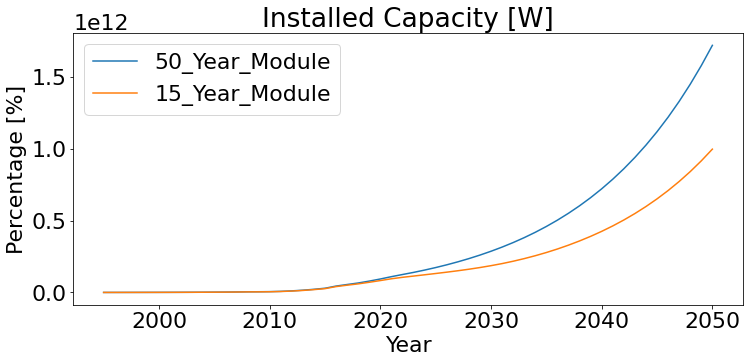

In [14]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

### Modifying Installed Capacity requirements to match 50 Year Module

In [10]:
r1.scenario['15_Year_Module_IncreasedInstalls'] = r1.scenario['15_Year_Module']


In [13]:
# Modifing the installed capacity requiremetns according to t50. 
# Needs to run each year becuase it needs to calculate the acumulated installs and deads.

for i in range (0, len(r1.scenario['50_Year_Module'].data)):
    Under_Installment = (r1.scenario['50_Year_Module'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['15_Year_Module'].data['Installed_Capacity_[W]'][i])  # WATTS
    r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] = (
                        r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] +
                        Under_Installment/1000000)


<ipython-input-13-8b618695a319>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] = (


In [15]:
r1.calculateMassFlow()


Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


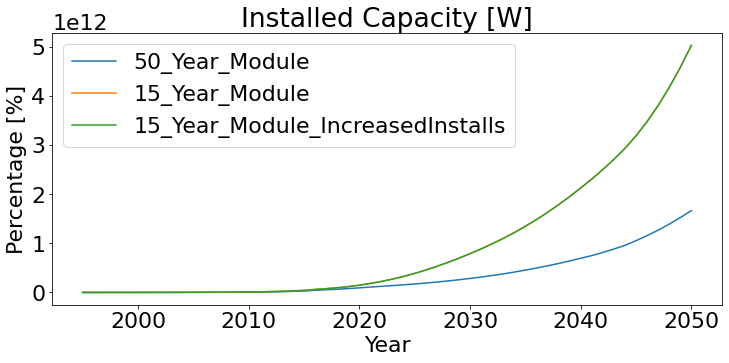

In [17]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

### No Deaths Allowed Scenario

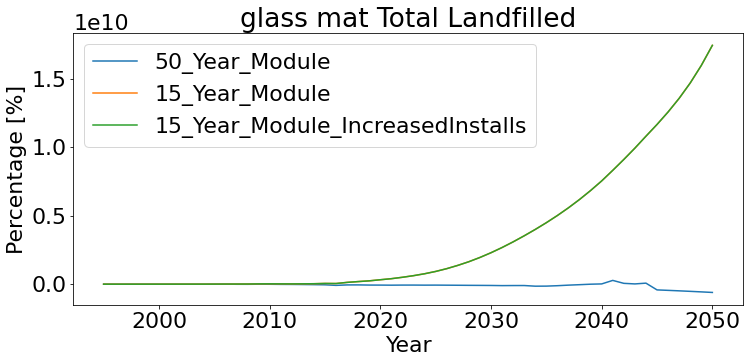

In [18]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

In [ ]:
'''r1.scenario['No_Deaths'] = r1.scenario['50_Year_Module']
r1.scenario['No_Deaths'].data['mod_reliability_t50'] = 100
r1.scenario['No_Deaths'].data['mod_reliability_t90'] = 150
r1.scenario['No_Deaths'].data['mod_Repowering'] = 100
r1.scenario['No_Deaths'].data['mod_Repairing'] = 100
'''

In [ ]:
'''
r1.calculateMassFlow()

r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')
'''

## SCENARIO: Modification of 15-year for high recycling

This scenario is a though experiment comparing a 15-year 95% recyclable module versus a 50-year module 30% recyclable module.
This is done to understand potential tradeoffs in PV technology evolution - is it better to create
a completely recyclable PV panel, or to extend the module lifetime.
This scenario assumes that the 15-year module is 95% recyclable into high quality material, i.e. it will be used to create new modules.

95% recyclability is represented by a 100% collection rate and a 95% efficient recycling process.

The 50-year module uses the previous settings.

In [22]:
r1.scenario['50_Year_Module'].data.keys()
r1.scenario['50_Year_Module'].material['glass'].materialdata.keys()


Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_recycled', 'mat_MFG_scrap_recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_NotRecycled', 'mat_modules_NotCollected',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EoL_Recycled_into_HQ', 'mat_EoL_Recycled_into_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_Manufactured', 'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_Recycled', 'mat_MFG_Scrap_Recycled_Losses_Landfilled',
       'mat_MFG_Recycled_into_HQ', 'mat_MFG_Recycled_into_OQ',
       'mat_MFG_Recycled_HQ_into_MFG', '

In [25]:
#modify 15-year module attributes df2, with no compensation for capacity
r1.scenario['15_Year_Module'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module'].data['mod_EOL_collection_eff'] = 100
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 95 #95% of the above 2 gets turned into new panels
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 95
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100

#modify df3, includes compensation for capacity
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 95 #95% of the above 2 gets turned into new panels
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 95
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100


In [26]:
r1.calculateMassFlow()

Working on Scenario:  50_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  15_Year_Module
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  15_Year_Module_IncreasedInstalls
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


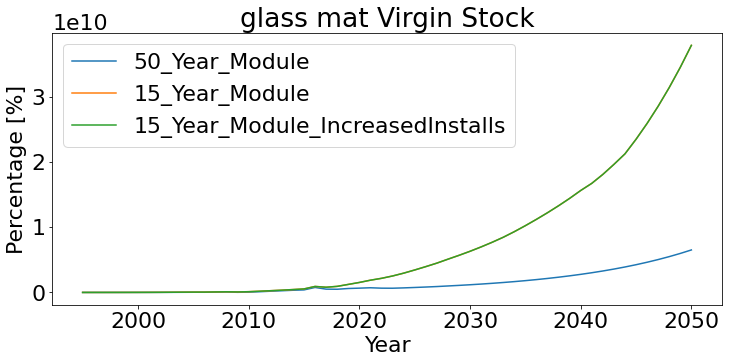

In [27]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Virgin_Stock')

Plot the annual waste glass sent to the landfill for this scenario. 
Here, because the 15-module is 100% collected and only 5% is landfilled during the recycling process
the landfilled glass is very low regardless of capacity assumptions.
Thus, if the intent is to avoid landfilled material, a 95% recyclable module is the best technology evolution.

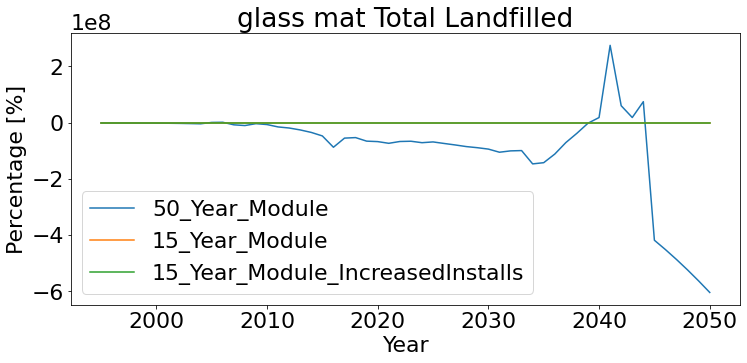

In [28]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

# IN DEVELOPMENT

## LCA Analysis of 15 vs 50 Year Module

We have previously obtained results for ladnfilled waste for 50 year module, 15 year module, and 15 year module with increased installations to reach to 50 year module installed capacity. This is applies the LCA methodology to evaluate environmetnal impacts based on landfilled area.

In [43]:
Area_50years = r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled'].sum()
Area_15years = r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled'].sum()
Area_15years_Increased_Installs = r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled'].sum()

#### First we calculate the Area, based on the glass thickness and glass density and the Total Landfilled Waste [kg]. The PV panel area will be equal to the Glass Area for our modeled scenarios so far.

In [35]:
[acidification, carcinogenics, ecotoxicity, eutrophication, 
fossil_fuel_depletion, global_warming,
non_carcinogenics, ozone_depletion, respiratory_effects, smog] = PV_DEMICE.calculateLCA(Area_50years)

In [38]:
[acidification2, carcinogenics2, ecotoxicity2, eutrophication2, 
fossil_fuel_depletion2, global_warming2,
non_carcinogenics2, ozone_depletion2, respiratory_effects2, smog2] = PV_DEMICE.calculateLCA(Area_15years)

In [44]:
[acidification3, carcinogenics3, ecotoxicity3, eutrophication3, 
fossil_fuel_depletion3, global_warming3,
non_carcinogenics3, ozone_depletion3, respiratory_effects3, smog3] = PV_DEMICE.calculateLCA(Area_15years_Increased_Installs)

In [47]:
global_warming = pd.DataFrame({'Global warming':['50 year', '15 year', '15 year*'], 
                               'val':[global_warming, global_warming2, global_warming3]})

Text(0.5, 1.0, 'Global Warming Effect, in kg CO2 eq')

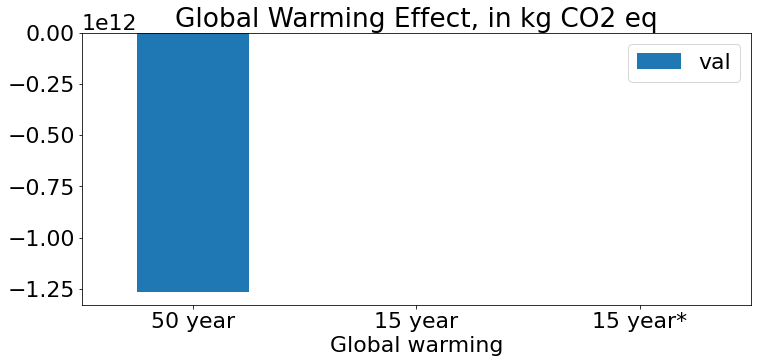

In [48]:
ax = global_warming.plot.bar(x='Global warming', y='val', rot=0)
plt.title('Global Warming Effect, in kg CO2 eq')